In [1]:
import os
import ROOT
from itertools import product

Welcome to JupyROOT 6.28/04


In [2]:
ERA = "2017"
MEASURE = "electron"
isQCD = True

In [3]:
ptCorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptCorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptCorr_bins = [10., 15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.579, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

In [14]:
if not isQCD:
    file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate.root" 
else:
    file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate_qcdV2.root"
print(file_path)
assert os.path.exists(file_path)
f = ROOT.TFile.Open(file_path)
h = f.Get("fakerate")

for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta+1e-5, ptCorr+1e-5)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

../results/2017/ROOT/electron/fakerate_qcdV2.root
0.0 10.0 0.6744117559856928 0.0103210350324471 1.530375907721581
0.0 15.0 0.44973822867922 0.0134019946849107 2.9799545224939727
0.0 20.0 0.3044050905601588 0.017193411172944 5.648200935570791
0.0 25.0 0.1894708022913028 0.0120484283497104 6.358989461176442
0.0 35.0 0.1448881130478891 0.0116167428384986 8.017733542198165
0.0 50.0 0.1468829407373356 0.0114287683679242 7.7808684320678
0.8 10.0 0.6859674904344476 0.0148046483388647 2.158214280605104
0.8 15.0 0.4522967056270046 0.0167756272635174 3.708987276452054
0.8 20.0 0.2919838121081848 0.0181095442478924 6.202242554865513
0.8 25.0 0.2124961625207134 0.013415528239764 6.313303770112225
0.8 35.0 0.1909521712291333 0.0144529821741219 7.568901720828839
0.8 50.0 0.1812148886638865 0.0116113033391378 6.407477566964268
1.579 10.0 0.7109212478645185 0.0223093375886979 3.1380884529350053
1.579 15.0 0.505200656373354 0.023239787072504 4.600110229336144
1.579 20.0 0.3571942454915228 0.0185762137

In [15]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

In [16]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [17]:
# prepare histograms
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

title = ""
if MEASURE == "muon":     title = "fake rate (#mu)"
if MEASURE == "electron": title = "fake rate (e)"
for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    #hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    if isQCD:
        hist.GetXaxis().SetRangeUser(10., 100.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle(title)


legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

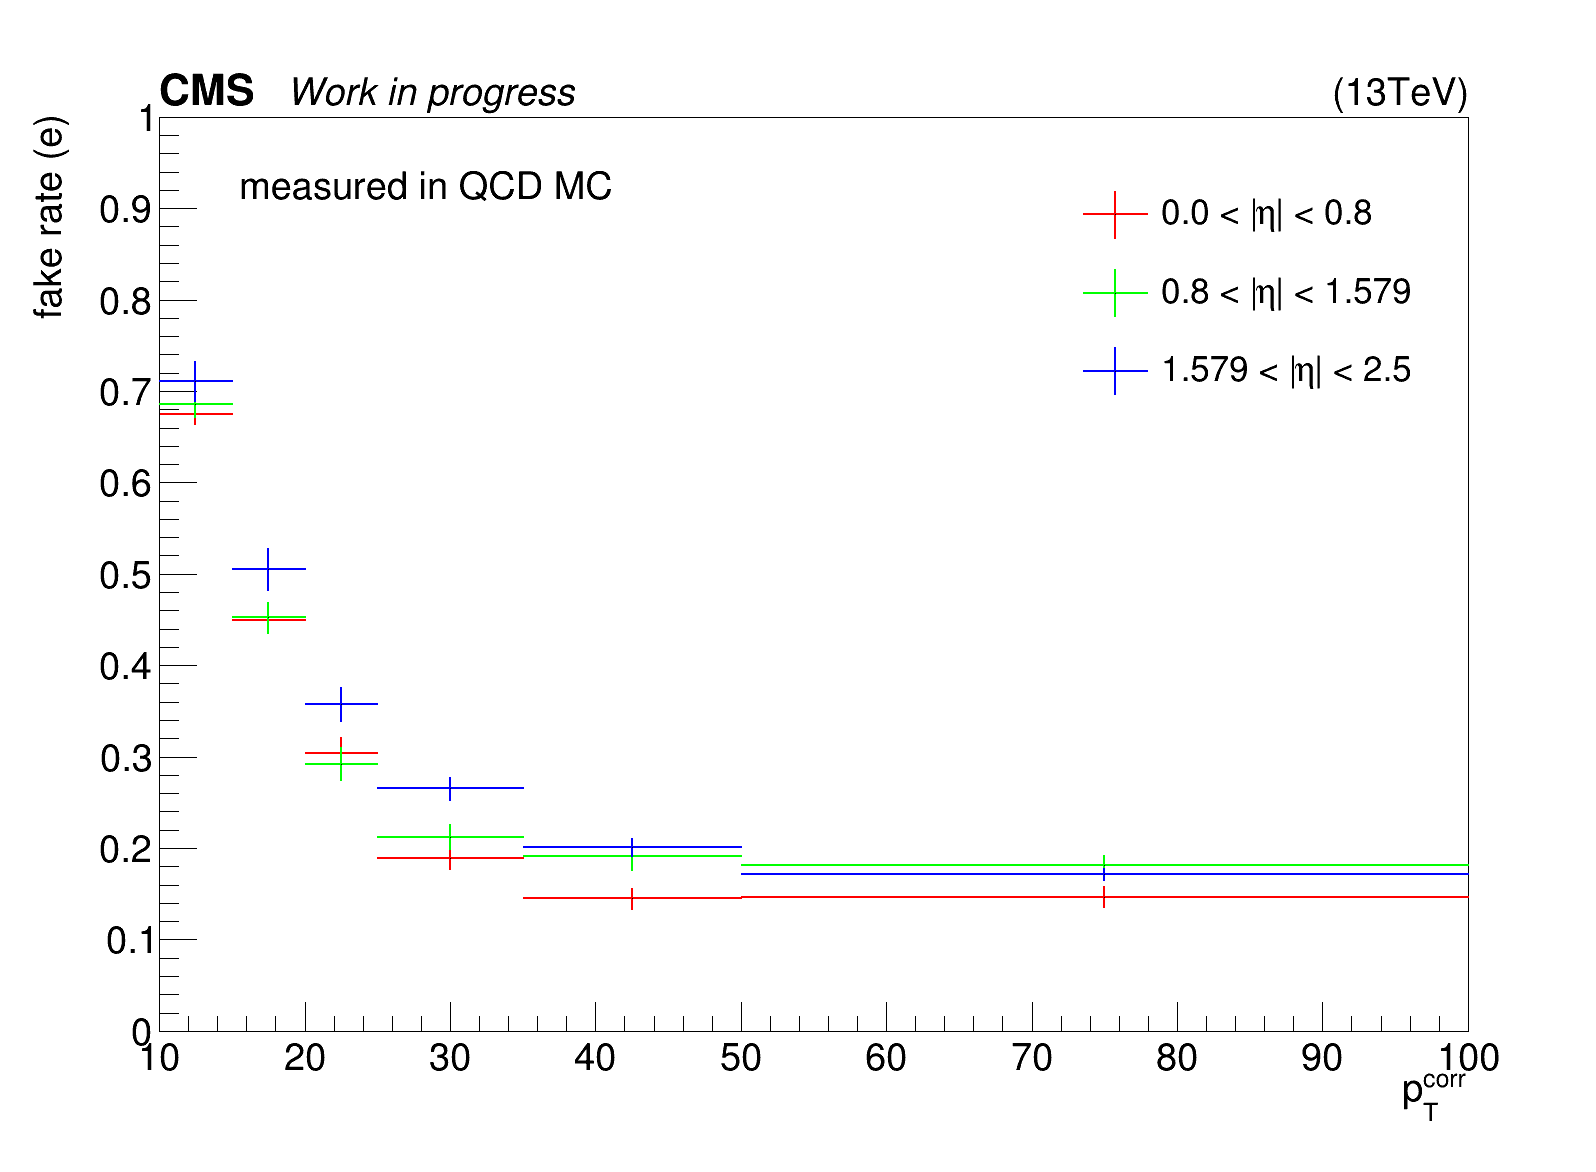

In [18]:
canvas.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
if isQCD:
    setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.83, "measured in QCD MC")


canvas.Draw()